In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [151]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
# Standardize column names and categorical values from multiple cases to lowercase with underscores

df.columns = df.columns.str.lower().str.replace(' ', '_')


#Finds all columns of type object (i.e., text columns).
# Converts text to lowercase and replaces spaces with underscores (e.g. 'No internet service' → 'no_internet_service').
# Ensures data is standardized so the model isn’t confused by case differences.
# Example: 'Total Charges' → 'total_charges'.

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')


In [153]:
# view the dataFrame in transpose form. not complsory, just to view data properly
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [154]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [155]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [156]:
# totalcharges column should be numeric but displayed as object due to presence of spaces in some rows. 
# Convert it to numeric, setting errors='coerce' to convert invalid parsing to NaN
# If any value cannot be converted (like empty spaces), it’s turned into NaN (errors='coerce').
# This was discovered during data exploration.

tc = pd.to_numeric(df['totalcharges'],errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [157]:
# now we have 111 rows as NaN values in 'tc' for rows where conversion failed
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [158]:
# Committing the concerted column datatype into the dataFrame 

df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')

In [159]:
# Converts properly and fills missing (NaN) values with 0.
# Important because ML models can’t handle text or NaNs.

df.totalcharges = df['totalcharges'].fillna(0)
df.totalcharges.isnull().sum()

np.int64(0)

In [160]:
# Check the target variable 'churn'.  it has values 'yes' and 'no' instead of 1 and 0
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [161]:
# replacing the values with 1 and 0
# Machine learning models need numeric targets.

df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

### Setting up validation framework
perform train, val, and test spit with scikit-learn

In [162]:
from sklearn.model_selection import train_test_split


In [163]:
# split the data into train and test sets and set random_state for reproducibility
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

len(df_full_train), len(df_test)


(5634, 1409)

In [164]:
# further split the full_train into train and val sets
# although, we are still doing same spliting formart but using different approach from the previous module
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [165]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [166]:
# reset indexes. though does not affect our model. it is a good practice to reset indexes after splitting
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [167]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [168]:
# create and separate the target values for train, val, and test sets
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values
y_train


array([0, 0, 1, ..., 1, 0, 1], shape=(4225,))

In [169]:
# remove the target column from the dataframes. 
# We will train the model using the remaining columns 
# and the model will not see the target column and get a hint of answer so the model does not cheat.
del df_train['churn']
del df_val['churn']
del df_test['churn']

### EDA
- Checking missing values
- Looking at the target varriable(churn)
- Looking at categorical and numerical varriales


In [170]:

# Helps treat different data types appropriately.
# Numerical → used as-is.
# Categorical → needs one-hot encoding.

df_full_train = df_full_train.reset_index(drop=True)


In [171]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [172]:
# checking the distribution of the target variable
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [173]:
# checking the proportion of churn and not churn in the target variable
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [174]:
# calculating the global churn rate (27%)
global_churn_rate = df_full_train.churn.mean()
global_churn_rate = round(global_churn_rate, 2)
global_churn_rate

np.float64(0.27)

In [175]:
# separating categorical and numerical columns from full_train dataframe
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [176]:
# separating numerical columns from full_train dataframe
numerical = ['tenure', 'monthlycharges', 'totalcharges']
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [177]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [178]:
# selecting categorical columns
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [179]:
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [180]:
# checking the number of unique values in each categorical column for the purpose of one-hot encoding
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature Importance  
- Churn Rate
- Risk Ratio
- Mutual Information (later)

In [181]:
global_churn_rate 

np.float64(0.27)

In [182]:
male_churn_rate = df_full_train[df_full_train['gender'] == 'male'].churn.mean()
male_churn_rate

np.float64(0.2632135306553911)

### Feature Importance: 
     difference
- Feature importance based on difference between global churn rate and group churn rate.
- when value is positive, it means the group is less likely to churn.
- when value is negative, it means the group is more likely to churn.


In [183]:
global_churn_rate - male_churn_rate

np.float64(0.006786469344608914)

In [184]:
female_churn_rate = df_full_train[df_full_train['gender'] == 'female'].churn.mean()
female_churn_rate

np.float64(0.27682403433476394)

In [185]:
global_churn_rate - female_churn_rate

np.float64(-0.006824034334763918)

In [186]:
partner_churn_rate = df_full_train[df_full_train.partner == 'yes'].churn.mean()
partner_churn_rate = round(partner_churn_rate, 2)
partner_churn_rate

np.float64(0.21)

In [187]:
global_churn_rate - partner_churn_rate

np.float64(0.060000000000000026)

In [188]:
no_partner_churn_rate = df_full_train[df_full_train['partner'] == 'no'].churn.mean()
no_partner_churn_rate = round(no_partner_churn_rate, 2)
no_partner_churn_rate

np.float64(0.33)

In [189]:
global_churn_rate - no_partner_churn_rate

np.float64(-0.06)

In [190]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

### Feature Importance: 
    Risk Ratio
- Risk ratio between global churn rate and group churn rate.
- when value is greater than 1, it means the group is less likely to churn.
- when value is less than 1, it means the group is more likely to churn.


In [191]:
male_churn_rate/global_churn_rate

np.float64(0.9748649283533003)

In [192]:
female_churn_rate/global_churn_rate

np.float64(1.0252742012398663)

In [193]:
# (0.7777777777777777) 23% lower than average churn rate
partner_churn_rate/global_churn_rate

np.float64(0.7777777777777777)

In [194]:
# (1.222222222222222) 22% higher than average churn rate
no_partner_churn_rate/global_churn_rate

np.float64(1.222222222222222)

In [195]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [196]:
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [197]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [198]:
from IPython.display import display

In [199]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    #print()   

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


### Feature importance: Mutual information
- Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

- https://en.wikipedia.org/wiki/Mutual_information

In [200]:
from sklearn.metrics import mutual_info_score


In [201]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [202]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [203]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [204]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

- From the outputs, we can see that contract has the highest mutual information score with churn variable
- Followed by partner which has more important information to share about churning than gender
- gender does not tell us much about churn compared to the other two variables

In [205]:
# Measure how much each categorical feature tells us about customer churn
# Features are ranked by their predictive power (mutual information score)

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature Importance
- Correlation

In [206]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [207]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

- From the above correlatrion output, the more the tenure, lesser the churn.
- the more the tenure, the more the totalcharges due to longer association with the company and less likelihood of leaving.
- the more the monthlycharges, the more the churn.

- Lets for further proof that from the codes below;


In [208]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [209]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [210]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [211]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [212]:
df_full_train[(df_full_train.tenure > 20) & (df_full_train.tenure <= 50)].churn.mean()

np.float64(0.2147165259348613)

In [213]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

### One-Hot Encoding
- Use scikit-learn to encode categorical features

In [214]:
from sklearn.feature_extraction import DictVectorizer
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [215]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:10].to_dict(orient='records')

In [216]:
d = DictVectorizer(sparse=False)
d.fit(dicts)
d.transform(dicts)

array([[ 0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  1.,  0.,  5.],
       [ 0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  1.,  0.,  6.]])

In [217]:
# above are just examples.
# now let the implement one-hot on both categorical and numerical features together

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
x_train = dv.fit_transform(train_dicts)
x_train.shape

# Converts rows into dictionaries, then into numeric matrices.
# Example: "contract" = "month-to-month" → contract=month_to_month: 1, others: 0.

(4225, 45)

In [218]:
# We do same for validation set but we do not use fit for val set to avoid data leakage to the model

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dicts)
x_val.shape

(1409, 45)

### Logistic Regression : Trains a logistic regression model.
#### Logistic regression estimates the probability of churn (1) vs. not churn (0).

- Binary Classification
- Linear Vs Logistics Regression

In [219]:
# 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-7, 7, 51)
sigmoid(10000000) # maximum value that can be returned is 1.0

np.float64(1.0)

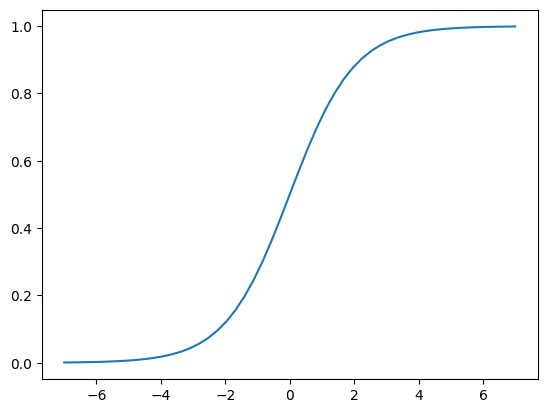

In [220]:
plt.plot(z, sigmoid(z))

In [221]:
# linear regression model
w0 = 200 # just example bias term
w = [0.2, 0.5, 0.3] # just example weights
def linear_regression(x1):
    result = w0

    for j in range(len(w)):
        result =  result + w[j] * x1[j]
        return result

In [222]:
# logistic regression model. we apply sigmoid function to the output of linear regression model
# sigmoid function maps any real-valued number into the (0, 1) interval, making it suitable for binary classification

def logistic_regression(x1):
    score = w0

    for j in range(len(w)):
        score =  score + w[j] * x1[j]
        result = sigmoid(score)
        return result

### Training Logistics Regresion with Scikit-Learn.
- Train a model with scikit-learn
- Apply it to validation set
- Calculate the accuracy

In [223]:
# The output of model.intercept_[0] means this is the bias term (intercept) of the trained logistic regression model
# Trains a logistic regression model.
# Logistic regression estimates the probability of churn (1) vs. not churn (0).

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.intercept_[0]

c:\Users\g\Machine-Learning-1st-Assigmnment\MLPractice\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(-0.10910575411731115)

In [224]:
# It means when all feature values are 0, the log-odds of the target variable is equal to this intercept value
model.coef_[0].round(3)


array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.25 ,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [225]:
# the output predictions for the training set and its called hard predictions.
# 0 stands for no churn and 1 stands for churn.
# meanwhile, we do not know the probability of values of churn yet.
model.predict(x_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [226]:
# the output probabilities are the predicted probabilities(soft predictions) of churn for each instance in the training set
# the first column is the probability of no churn (class 0) and the second column is the probability of churn (class 1)
# we are only interested in the second column
model.predict_proba(x_train)

array([[0.90452492, 0.09547508],
       [0.32058285, 0.67941715],
       [0.36630247, 0.63369753],
       ...,
       [0.46766799, 0.53233201],
       [0.95761329, 0.04238671],
       [0.3012034 , 0.6987966 ]], shape=(4225, 2))

In [ ]:
# we do same for validation set
y_pred = model.predict_proba(x_train)[:, 1]
y_pred


array([0.09547508, 0.67941715, 0.63369753, ..., 0.53233201, 0.04238671,
       0.6987966 ], shape=(4225,))

In [229]:
churn_decision = y_pred >= 0.5
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [230]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 312, dtype: object

In [231]:
# calculating the accuracy of the model on validation set

(y_val == churn_decision).mean()

# the accuracy of the model on validation set is 0.8034 or 80.34%
# If probability ≥ 0.5 → predict churn. Compares with actual values to get accuracy (≈ 80.34%).

np.float64(0.8026969481902059)

In [232]:
# lets see compared prediction with actual values (y_val) in dataframe
df_pred = pd.DataFrame()
df_pred['probbility'] = y_pred
df_pred['actual'] = y_val
df_pred['churn_decision'] = churn_decision.astype(int)
df_pred

,probbility,actual,churn_decision
0,0.008968,0,0
1,0.204542,0,0
2,0.212152,0,0
3,0.543024,1,1
4,0.213658,0,0
...,...,...,...
1404,0.313711,0,0
1405,0.039280,1,0
1406,0.136322,0,0
1407,0.799954,1,1


In [233]:
df_pred['correct'] = df_pred['actual'] == df_pred['churn_decision']
df_pred.head(20)

,probbility,actual,churn_decision,correct
0,0.008968,0,0,True
1,0.204542,0,0,True
2,0.212152,0,0,True
3,0.543024,1,1,True
4,0.213658,0,0,True
5,0.205212,0,0,True
6,0.027733,0,0,True
7,0.002967,0,0,True
8,0.582746,1,1,True
9,0.461626,1,0,False


### Model Interpretation
- Looking at the Coefficients
- Train a smaller odel wih fewer features

In [234]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

# The output shows the feature names along with their corresponding coefficients from the trained logistic regression model.


{'contract=month-to-month': np.float64(0.476),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.336),
 'internetservice=fiber_optic': np.float64(0.317),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.142),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.266),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [235]:
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records') 

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [236]:
dicts_small_train = df_train[small].to_dict(orient='records')
dicts_small_val = df_val[small].to_dict(orient='records')

dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_small_train)


,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [237]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [238]:
x_small_train  = dv_small.transform(dicts_small_train)
model_small = LogisticRegression()
model_small.fit(x_small_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [239]:

w0 = model_small.intercept_[0]
w = model_small.coef_[0].round(3)
w0, w

(np.float64(-2.477957596026966),
 array([ 0.971, -0.024, -0.948,  0.027, -0.036]))

In [240]:
# the code below creates a dictionary mapping feature names to their coefficients

dict(zip(dv_small.get_feature_names_out(), w))

# the output shows the feature names along with their corresponding coefficients from the smaller logistic regression model.
# trained on a subset of features (contract, tenure, monthlycharges).

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [241]:
# what this means is theat the intercept is -2.47, the coefficient for contract=month-to-month is 0.971,
# the coefficient for monthlycharges is 0.027, and the coefficient for tenure is -0.036.
(-2.47 + 0.971 + 50*0.027 + 5*(-0.036))

-0.329

In [242]:
# the output means the probability of churn for a customer  is 41.8% and likiely not churn.
sigmoid(_)

np.float64(0.41848395843712505)

### Using the Model

In [243]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:2]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [244]:
dv = DictVectorizer(sparse=False)
x_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values
model = LogisticRegression()
model.fit(x_full_train, y_full_train)

c:\Users\g\Machine-Learning-1st-Assigmnment\MLPractice\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# do same for test set
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
x_test = dv.transform(dicts_test)
y_pred = model.predict_proba(x_test)[:, 1]
churn_decision = y_pred >= 0.5
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

In [246]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [247]:
x_small = dv.transform([customer])
x_small


array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [248]:
model.predict_proba(x_small)[0, 1]


np.float64(0.6584201121103557)

In [266]:
y_test[-1]

np.int64(1)

# End-to-End Workflow: Build, Train, Evaluate, Interpret and Deploy a Logistic Regression Model

This document lists step-by-step actions (no code) and explains **WHY** each step is necessary. Use this as a checklist when you run the notebook locally.

---

## 1. Project Setup & Environment
- Create a dedicated environment (virtualenv/conda) to manage package versions.
- **Why:** Ensures reproducibility and avoids dependency conflicts.

## 2. Data Acquisition
- Download or access the dataset (CSV, database, or API).
- **Why:** The model needs a reliable, consistent source of truth for training and evaluation.

## 3. Initial Data Inspection
- Preview the data (first rows), check column names, and understand basic schema.
- **Why:** Quick sanity check to detect immediate issues (encoding, wrong delimiters).

## 4. Clean Column Names & Text
- Normalize column names (lowercase, replace spaces with underscores).
- Clean categorical text values (lowercase, replace spaces with underscores).
- **Why:** Consistent naming prevents bugs and mismatches during feature engineering.

## 5. Fix Data Types & Missing Values
- Convert numeric columns stored as text to numeric types (coerce invalid → NaN).
- Decide how to handle NaNs (fill with 0, median, or drop rows) based on context.
- **Why:** Models need numeric input and cannot train on malformed strings or NaNs.

## 6. Encode the Target Variable
- Convert target labels (e.g., 'yes'/'no') to numeric (1/0).
- **Why:** Models require numeric targets for supervised learning.

## 7. Exploratory Data Analysis (EDA)
- Check class balance, missing values, basic statistics, and distributions.
- Examine relationships between features and target (group churn rates, correlation).
- **Why:** Helps identify predictive features, data imbalance, or data leakage risks.

## 8. Feature Selection
- Choose numerical and categorical features to include (remove identifiers like ID).
- **Why:** Removing irrelevant or leaking features improves model generalization.

## 9. Split Data (Train / Validation / Test)
- Split dataset (e.g., 60% train, 20% val, 20% test) using a fixed random seed.
- **Why:** Validation gives a realistic estimate of performance during development; test is for final unbiased evaluation.

## 10. Prepare Target Arrays & Remove Target Column from Features
- Separate y arrays and delete the target column from feature tables.
- **Why:** Ensures the model does not see the label as a feature during training.

## 11. OneHot Encode Categorical Features & Combine with Numeric
- Use DictVectorizer or OneHotEncoder + ColumnTransformer to create numeric matrices.
- Fit the encoder on training data only; use transform on validation/test to avoid leakage.
- **Why:** Machine learning models require numeric input; fitting only on training avoids leaking information.

## 12. Feature Scaling (Optional but Recommended)
- Standardize numeric features (StandardScaler) if using solvers sensitive to scale.
- **Why:** Helps optimization converge faster and often improves model performance.

## 13. Train the Model
- Train LogisticRegression (increase max_iter if convergence warning appears).
- **Why:** Learns coefficients (weights) mapping features to predicted probability of the target.

## 14. Evaluate on Validation Set
- Use predict_proba to get probabilities and compute metrics: ROC-AUC, accuracy, precision, recall, confusion matrix.
- Try different thresholds (not always 0.5) and analyze precision/recall trade-offs.
- **Why:** Evaluates generalization and helps choose model and threshold for deployment goals.

## 15. Interpret Model Coefficients
- Map model.coef_ to feature names and inspect sign and magnitude (positive increases probability).
- **Why:** Understand drivers of predictions and validate they align with domain knowledge.

## 16. Iterate & Improve
- Feature engineering, add interaction terms, try regularization (C parameter), handle imbalance (class_weight or resampling).
- **Why:** Improve performance and robustness based on validation findings.

## 17. Retrain on Full Training Set (Train + Val) for Deployment
- Combine train and val, and fit the final model and encoder.
- **Why:** Use all labelled data available to produce the strongest final model before testing.

## 18. Evaluate on Test Set (Final Check)
- Transform test with the same encoder, get final metrics, and confirm expected performance.
- **Why:** Provides the unbiased estimate of how the model will perform in production.

## 19. Save Artifacts (Model + Encoder + Scaler)
- Save vectorizer, model, and any scalers as binary files (pickle, joblib, or similar).
- **Why:** You will load these artifacts in the production environment to ensure identical preprocessing and predictions.

## 20. Build a Small Prediction Service / API
- Wrap the model + encoder into a web service (e.g., FastAPI) that accepts JSON, transforms it using the saved encoder, and returns probabilities.
- **Why:** Makes your model accessible for real-time predictions and integration with other systems.

## 21. Test the API Locally
- Use sample customer records to ping the API and confirm expected output.
- **Why:** Validates serialization, preprocessing, and endpoint logic before production rollout.

## 22. Monitor & Log Predictions in Production
- Log inputs, predictions, and optionally feedback labels. Monitor data drift and model performance.
- **Why:** Models degrade over time; monitoring helps detect drift, concept change, and the need for retraining.

## 23. Re-training Strategy & Automation
- Decide retraining cadence (periodic or triggered by drift), and automate data collection, training, evaluation, and deployment pipelines.
- **Why:** Keeps your model accurate as data distributions change.

## 24. Documentation & Reproducibility
- Document data sources, preprocessing steps, model hyperparameters, and evaluation metrics.
- Use version control and save random seeds in experiments.
- **Why:** Ensures other team members (or future you) can reproduce and trust the results.

## 25. Ethical Considerations & Data Privacy
- Remove or obfuscate personally identifiable information (PII), ensure compliance with regulations (e.g., GDPR).
- **Why:** Protects user privacy and avoids legal issues.

---

## Appendix: Common Checklist Before Production

- ✅ No target leakage
- ✅ Consistent preprocessing between training and inference
- ✅ Saved model + preprocessing artifacts
- ✅ Performance baseline and rollback plan
- ✅ Monitoring and alerting in place
- ✅ Tests for edge cases and invalid inputs



### Accuracy and Dummy Model
- Evalute the Model on Different Threshold
- Check Accuracy of the Dummy Baseline


In [ ]:
# using this to reset the variables overwrote that was done

# train set
y_pred_train = model.predict_proba(x_train)[:, 1]

# validation set
y_pred_val = model.predict_proba(x_val)[:, 1]

# test set
y_pred_test = model.predict_proba(x_test)[:, 1]


In [267]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred_val >= 0.5)

0.8055358410220014

In [268]:
# Manual Accuracy score check. we do not actually need this since it can be done with a module above
threshod = np.linspace(0, 1, 21)

scores = []
for t in threshod:
    score = accuracy_score(y_val, y_pred_val >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)


0.00 0.274
0.05 0.506
0.10 0.600
0.15 0.664
0.20 0.724
0.25 0.749
0.30 0.767
0.35 0.776
0.40 0.793
0.45 0.796
0.50 0.806
0.55 0.815
0.60 0.804
0.65 0.789
0.70 0.779
0.75 0.746
0.80 0.737
0.85 0.727
0.90 0.726
0.95 0.726
1.00 0.726


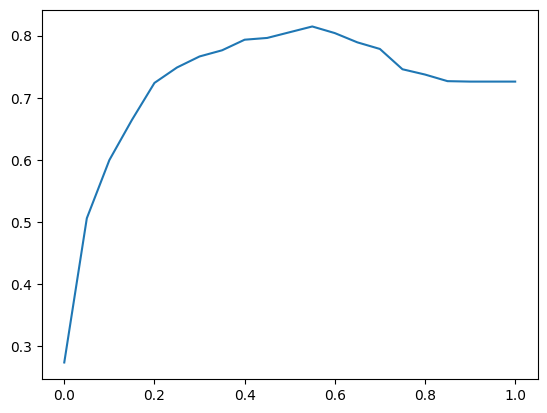

In [269]:
import matplotlib.pyplot as plt
plt.plot(threshod, scores)

In [271]:
from collections import Counter

Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [270]:
1 - y_val.mean()

np.float64(0.7260468417317246)

### Confusion Table
- Different types of Error and Correct Decison
- Arranging them in a Table

In [ ]:
# Correct prediction for validation
y_pred_val = model.predict_proba(x_val)[:, 1]

# Correct confusion matrix
t = 0.5
Actual_positive  = (y_val == 1)
Actual_negative = (y_val == 0)

Positive_prediction = (y_pred_val >= t)
Negative_prediction = (y_pred_val < t)

tp = (Positive_prediction & Actual_positive).sum()
tn = (Negative_prediction & Actual_negative).sum()
fp = (Positive_prediction & Actual_negative).sum()
fn = (Negative_prediction & Actual_positive).sum()


array([[918, 105],
       [169, 217]])

In [287]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[918, 105],
       [169, 217]])

In [291]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

### Precision and Recall
- Pecision

In [297]:
p = (tp/(tp+ fp)).round(2)
print(f'Precision:{p}%')

Precision:0.67%
